#**Classificação: Resolvendo problemas multiclasse**

##**Aula 1 - Conhecendo os dados**

###**Carregando os dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [ ]:
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

###**Entendendo os dados**

In [ ]:
df['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

##**Aula 2 - Explorando os dados**

###**Dados demográficos**

* Estado civil
* Migração
* Sexo
* Idade na inscrição
* Estrangeiro

In [ ]:
df['Estado civil'].value_counts(normalize = True)*100

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

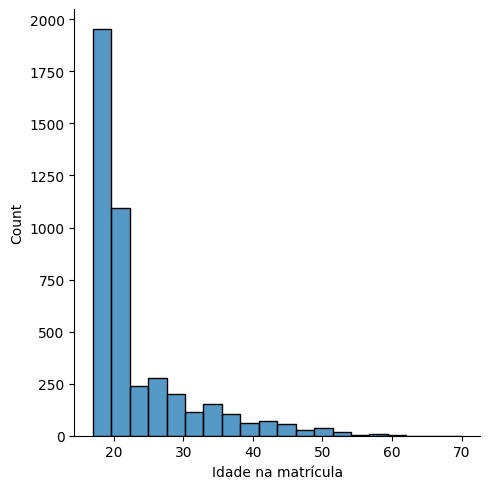

In [ ]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

In [ ]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}

# Definindo a paleta de cores
sns.set_palette(list(color_dict.values()))

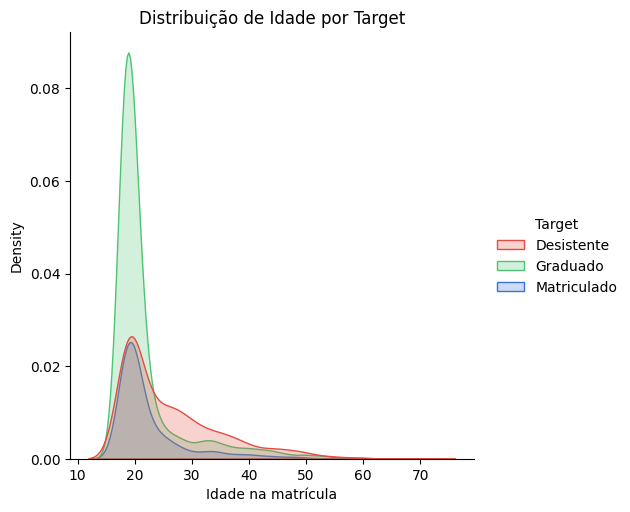

In [ ]:
sns.displot(data=df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.title('Distribuição de Idade por Target')
plt.show()

In [ ]:
df['Estrangeiro'].value_counts(normalize = True)*100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [ ]:
df['Sexo'].value_counts(normalize = True)*100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

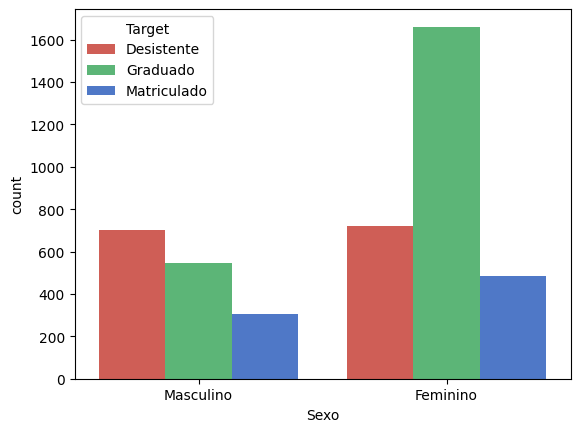

In [ ]:
sns.countplot(x='Sexo', hue='Target', data=df)
plt.show()

###**Dados socioeconômicos e macroeconômicos**

**Socioeconômicos**
* Necessidades educacionais especiais
* Devedor
* Taxas de matrícula em dia
* Bolsista

**Macroeconômicos**
* Taxa de desemprego
* Taxa de inflação
* PIB

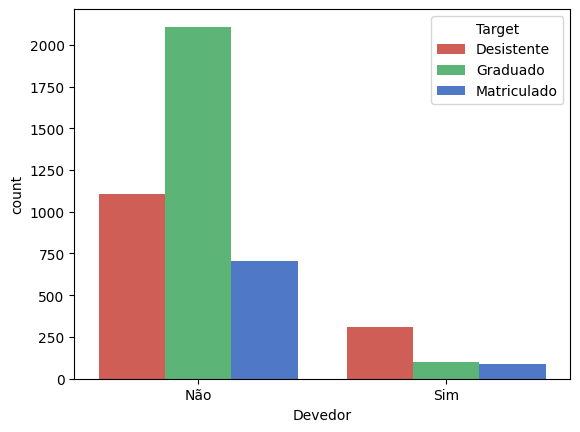

In [ ]:
sns.countplot(x='Devedor', hue='Target', data=df)
plt.show()

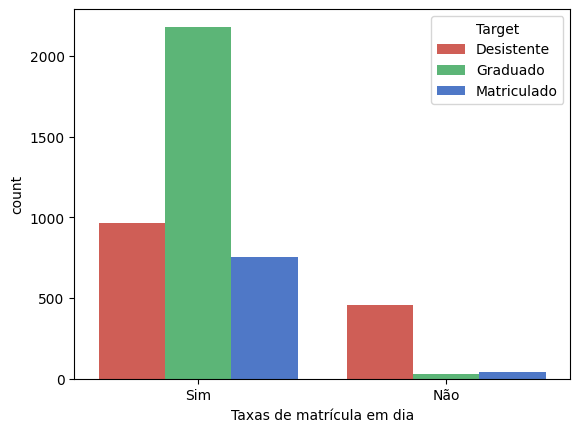

In [ ]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df)
plt.show()

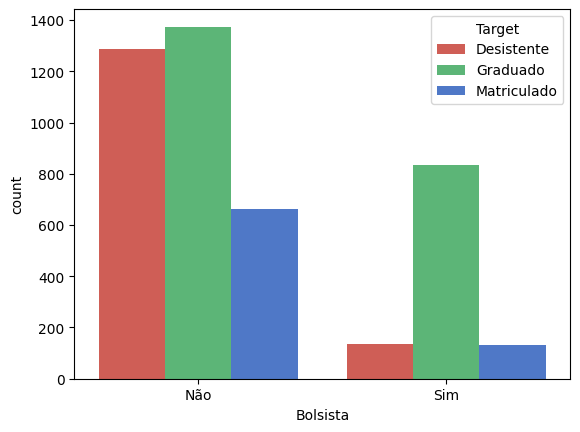

In [ ]:
sns.countplot(x='Bolsista', hue='Target', data=df)
plt.show()

###**Dados no momento da matrícula**

* Curso
* Período
* Qualificação prévia

In [ ]:
import plotly.express as px

In [ ]:
# Calcula as contagens das combinações Curso-Target
contagem = df.groupby(["Curso", "Target"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("Curso")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Cria o gráfico interativo
fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})

# Mostra o gráfico
fig.show()

###**Dados acadêmicos**

* disciplinas creditadas
* disciplinas matriculadas
* disciplinas avaliações
* disciplinas aprovadas
* disciplinas notas
* disciplinas sem avaliações
* disciplinas faltas

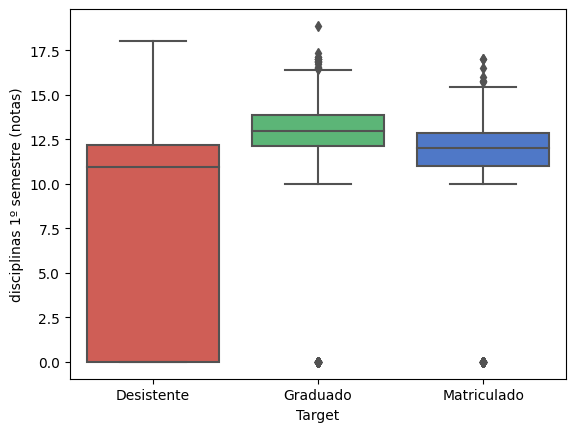

In [ ]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df)
plt.show()

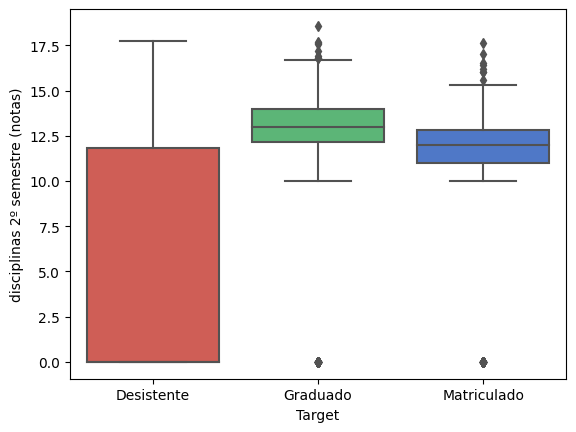

In [ ]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=df)
plt.show()

In [ ]:
df['Target'].value_counts(normalize = True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

##**Aula 3 - Realizando o treinamento**

###**Preparando os dados**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

# Selecionando apenas as colunas categóricas do dataframe
df_categorico = df[colunas_categoricas]

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')

# Ajustando e transformando os dados, criando um novo dataframe com as colunas codificadas
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

# Combinando as colunas codificadas com as colunas não codificadas do dataframe original
df_final = pd.concat([df.drop(colunas_categoricas, axis=1), df_encoded], axis=1)


In [ ]:
df_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Separando os dados**

In [ ]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [ ]:
from sklearn.model_selection import train_test_split

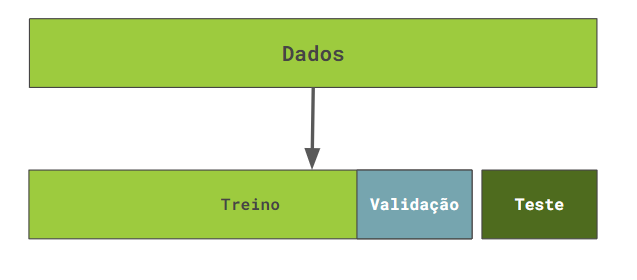

In [ ]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)

###**Treinando o modelo com Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.9975177304964539
Acurácia de validação: 0.7680851063829788


In [ ]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.898936170212766
Acurácia de validação: 0.7734042553191489


##**Aula 4 - Avaliando o modelo**

###**Analisando a matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
matriz_confusao = confusion_matrix(y_val, y_pred)

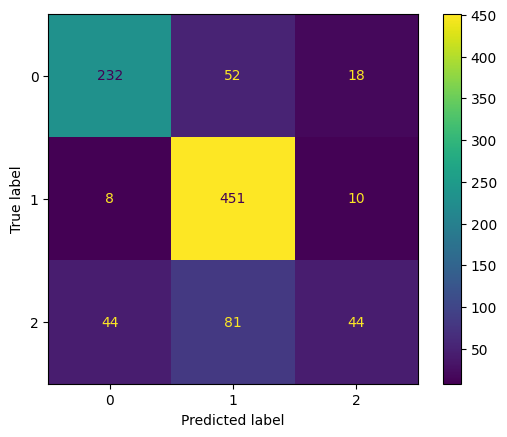

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();

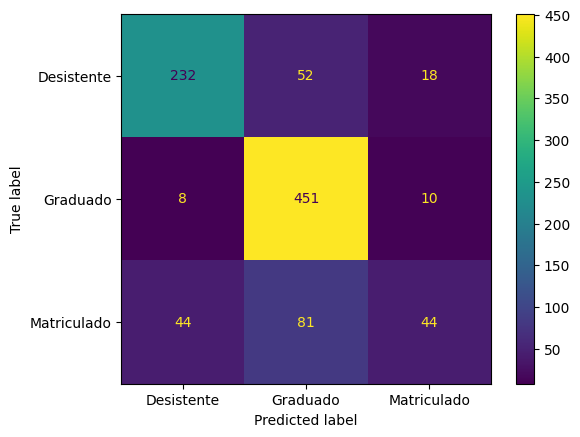

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=modelo_rf.classes_)
visualizacao.plot();

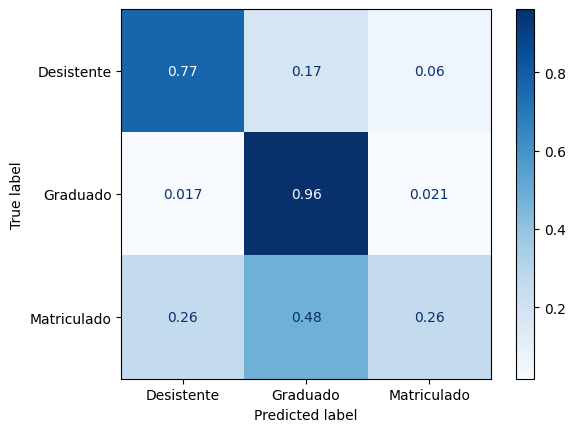

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

###**Analisando o relatório de métricas**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



###**Aplicando a técnica de superamostragem**

In [ ]:
y_treino.value_counts()

Graduado       1408
Desistente      906
Matriculado     506
Name: Target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [ ]:
y_balanceado.value_counts()

Desistente     1408
Graduado       1408
Matriculado    1408
Name: Target, dtype: int64

In [ ]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

###**Analisando as métricas após o balanceamento**

              precision    recall  f1-score   support

  Desistente       0.85      0.72      0.78       302
    Graduado       0.81      0.88      0.84       469
 Matriculado       0.50      0.53      0.51       169

    accuracy                           0.76       940
   macro avg       0.72      0.71      0.71       940
weighted avg       0.77      0.76      0.76       940



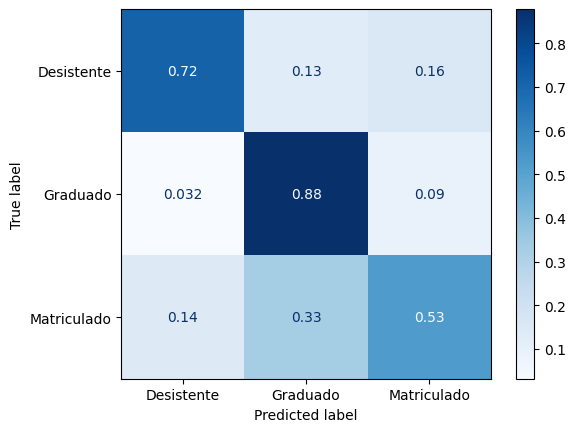

In [ ]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

##**Aula 5 - Validando o modelo**

###**Pipeline para validação**

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

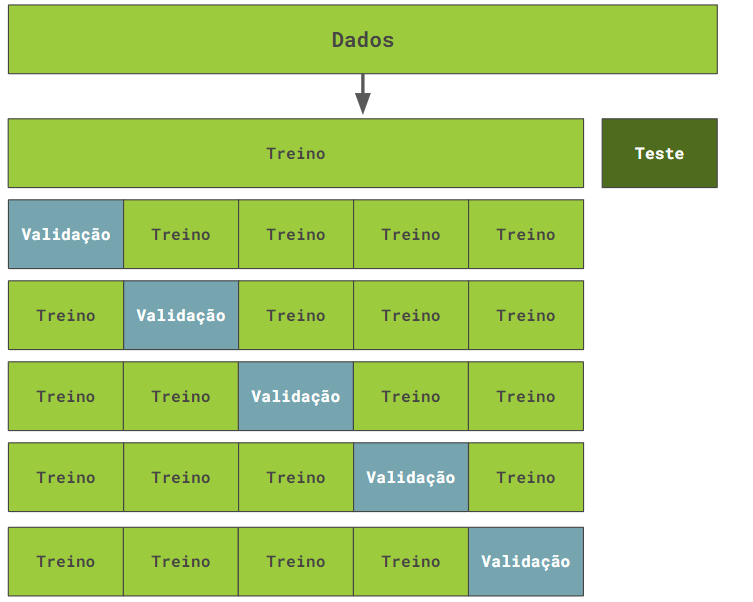

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.76329787, 0.74468085, 0.75265957, 0.7606383 , 0.74601064])

In [ ]:
# Intervalo de confiança
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.7384502808726957, 0.7684646127443254]


###**Testando o modelo**


              precision    recall  f1-score   support

  Desistente       0.87      0.74      0.80       213
    Graduado       0.82      0.86      0.84       332
 Matriculado       0.49      0.56      0.53       119

    accuracy                           0.77       664
   macro avg       0.73      0.72      0.72       664
weighted avg       0.78      0.77      0.77       664



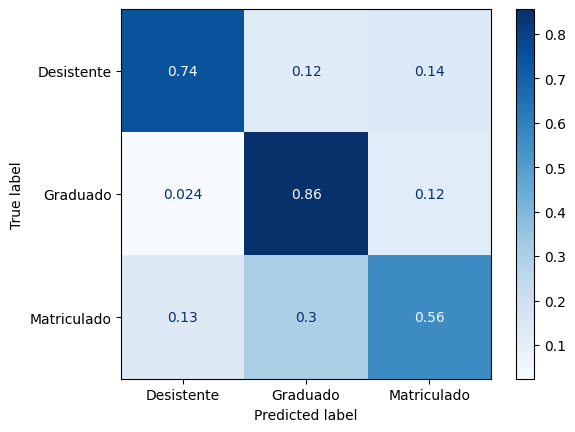

In [ ]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');